# 混合模型 Mixture Models

## 聚类

无监督学习（Unsupervised Learning）是机器学习的一种类型，其中算法在没有明确的标签或指导的情况下对数据进行分析和建模。在无监督学习中，系统试图从数据中学习模式和结构，而不是依赖于预先定义的输出变量。以下是无监督学习的一些主要特点和方法：

### 特点：
1. **没有标签数据**：数据不包含明确的响应变量或标签。
2. **自我组织**：算法必须自行识别数据中的模式、结构或特征。
3. **探索性分析**：无监督学习通常用于探索性数据分析，寻找数据中的隐藏模式或固有结构。

### 常见方法：
1. **聚类**（Clustering）：这是无监督学习中最常见的方法之一，旨在将数据分组成若干类别或“簇”，使得同一簇内的数据点彼此相似，而不同簇的数据点彼此不同。常见的聚类算法包括K-means、层次聚类和DBSCAN等。

2. **关联规则学习**（Association Rule Learning）：在大型数据库中寻找项目、事件或其他对象之间的有趣关系。例如，市场篮分析（market basket analysis）就是使用关联规则学习来发现购物篮中商品间的关联。

3. **降维**（Dimensionality Reduction）：这是一种减少数据集中变量数量的技术，旨在保留最重要的信息。这对于高维数据（例如图像、声音）尤为重要。常用的降维技术包括主成分分析（PCA）、t-分布随机邻域嵌入（t-SNE）和自动编码器等。

4. **异常检测**（Anomaly Detection）：识别数据集中的异常值或异常模式。这对于识别欺诈行为、网络安全威胁等场景特别有用。

### 应用领域：
- 市场细分
- 社交网络分析
- 组织大规模文档集合
- 图像分割
- 推荐系统（如通过用户购买模式推荐商品）

### 优点与挑战：
- **优点**：处理未标记的数据，帮助发现数据中的隐藏模式。
- **挑战**：解释结果较为困难，评估模型性能也不像有监督学习那样直接。

总的来说，无监督学习对于理解和解释数据的底层结构是非常有价值的，尤其是在标签数据缺乏或获取成本过高的情况下。

## K-means K均值聚类

- 假设我们想把数据点分成 $K$ 组, $K$ 已知。

- 直观想法: 与组内点的距离小于与组外点的距离。

- 一种方法: 找一些原型prototype $\mu_k$ （聚类中心cluster centroids）

- 在K-均值法中, 定义畸变函数（Distortion function）：
$$
J\left(\left\{r_{n k}\right\},\left\{\boldsymbol{\mu}_k\right\}\right)=\sum_{n=1}^N \sum_{k=1}^K r_{n k}\left\|\mathbf{x}_n-\boldsymbol{\mu}_k\right\|^2
$$
- $r_{n k}$ 是第 $n$ 个数据点分类结果的独热编码（的 $k$ 分量）。如果被分到第 $k$ 个组, 则 $r_{n k}=1$

任务变成:
$$
\min _{r_{n k}, \boldsymbol{\mu}_k} J\left(\left\{r_{n k}\right\},\left\{\boldsymbol{\mu}_k\right\}\right)
$$

(1) $\min _{r_{n k}} J \quad \Rightarrow \quad r_{n k}= \begin{cases}1, & \text { if } k=\arg \min _j\left\|\mathbf{x}_n-\boldsymbol{\mu}_j\right\|^2 \\ 0, & \text { otherwise }\end{cases}$ 
- $\mathbf{x}_n$ 离哪个 $\boldsymbol{\mu}_j$ 近就分到哪个组。

(2) $\min _{\boldsymbol{\mu}_k} J \quad \Rightarrow \quad \boldsymbol{\mu}_k=\dfrac{\sum_n^N r_{n k} \mathbf{x}_n}{\sum_n^N r_{n k}}$
- $\boldsymbol{\mu}_k$ 等于组内数据点 $\mathbf{x}_n$ 的平均值。

(3)不断循环 $(1,2)$, 迭代求解。
- $J$ 不断下降, 但有可能收敛到局部极小值。可用不同初值多次求解。


### Chat with GPT

K-means 是一种广泛使用的聚类算法，在无监督学习中应用非常广泛。它的目标是将数据点分组成 K 个簇（cluster），以便在同一簇内的数据点之间的相似性最大，而不同簇之间的相似性最小。下面是 K-means 算法的详细介绍和数学公式：

### K-means 算法步骤：
1. **初始化**：随机选择 K 个数据点作为初始质心（centroid）。
2. **分配**：将每个数据点分配给最近的质心，形成 K 个簇。
3. **更新**：重新计算每个簇的质心，即每个簇内所有点的均值。
4. **迭代**：重复步骤 2 和 3，直到质心不再显著变化或达到预定的迭代次数。

### 数学表示：
设 $ X = \{x_1, x_2, ..., x_n\} $ 是一个包含 n 个数据点的集合，每个数据点 $ x_i $ 是一个 d 维的向量。K-means 算法试图找到 K 个簇 $ S = \{S_1, S_2, ..., S_K\} $，以及与之对应的 K 个质心 $ C = \{c_1, c_2, ..., c_K\} $，使得簇内平方误差（Within-cluster Sum of Squares, WCSS）最小化。

WCSS 的数学公式为：
$$ WCSS = \sum_{i=1}^{K} \sum_{x \in S_i} ||x - c_i||^2 $$
其中，$ ||x - c_i|| $ 表示数据点 x 到其对应簇质心 $ c_i $ 的欧几里得距离。

### 算法过程：
1. **初始化**：选择 K 个随机数据点作为初始质心。
2. **分配**：对于每个数据点 $ x_j $，找到距离 $ x_j $ 最近的质心 $ c_i $，并将 $ x_j $ 分配给相应的簇 $ S_i $。
   $$ S_i^{(t)} = \{ x_j : ||x_j - c_i^{(t)}|| \leq ||x_j - c_k^{(t)}||, \forall k, 1 \leq k \leq K \} $$
3. **更新**：重新计算每个簇的质心为该簇内所有点的均值。
   $$ c_i^{(t+1)} = \frac{1}{|S_i^{(t)}|} \sum_{x_j \in S_i^{(t)}} x_j $$
4. **迭代**：重复步骤 2 和 3，直到质心的变化小于一个预设阈值或达到预定迭代次数。

### 算法特点：
- K-means 算法简单易实现，计算效率高。
- 它通常适用于数据点呈球状分布的情况。
- 需要预先指定簇的数量 K。
- 对初始质心的选择敏感，可能会导致局部最优解。

### 应用：
K-means 用于市场细分、社交网络分析、图像分割、数据压缩等领域。

### K-means 与 KNN 的区别：

K-means 和 KNN（K-Nearest Neighbors）是两种完全不同类型的算法，分别用于解决聚类和分类问题。

#### K-means（K均值聚类）

K-means 是一种无监督学习算法，主要用于数据的聚类分析。它的目标是将数据点分组成 K 个簇，以使得簇内的数据点尽可能相似，而簇间的数据点尽可能不同。

##### 数学表示
- **目标函数**：
  $$ \text{Minimize} \sum_{i=1}^K \sum_{x \in S_i} ||x - c_i||^2 $$
  其中，$ c_i $ 是簇 $ S_i $ 的质心。

- **算法过程**：
  1. 随机选择 K 个数据点作为初始质心。
  2. 将每个数据点分配给最近的质心，形成 K 个簇。
  3. 重新计算每个簇的质心。
  4. 重复步骤 2 和 3，直到质心不再变化或达到一定迭代次数。

#### KNN（K最近邻）

KNN 是一种监督学习算法，主要用于分类（有时也用于回归）。它的基本思想是基于数据点的邻近性进行分类或预测。

##### 数学表示
- **分类规则**：
  对于一个新的未标记数据点，KNN 查找训练集中离该点最近的 K 个数据点，并基于这些邻居的类别来预测未知点的类别。

- **距离度量**：
  一般使用欧几里得距离，但也可以使用其他距离度量，如曼哈顿距离或切比雪夫距离。

- **算法过程**：
  1. 计算未知数据点与每个训练数据点之间的距离。
  2. 选取距离最近的 K 个训练数据点。
  3. 根据这些最近邻居的类别，通过投票的方式决定未知点的类别。

#### 区别
1. **类型**：K-means 是无监督学习算法，用于聚类；KNN 是监督学习算法，用于分类或回归。
2. **目标**：K-means 的目标是将数据点分组为 K 个簇；KNN 的目标是根据最近的 K 个邻居来预测未知数据点的类别或数值。
3. **数据标签**：K-means 不需要数据点的标签；KNN 需要已标记的数据点来训练模型。
4. **应用场景**：K-means 适用于探索数据结构，寻找数据的自然分组；KNN 适用于基于已知数据点的特征和标签进行预测。

### 在线学习与 k-means

$$
\boldsymbol{\mu}_k^{\text {(new) }}=\boldsymbol{\mu}_k^{\text {(old) }}+\eta_n\left(\mathbf{x}_n-\boldsymbol{\mu}_k^{\text {(old) })}\right)
$$

基于任何距离（相似性）定义 $\mathcal{V}$

- 不一定使用欧氏距离
$$
\tilde{J}=\sum_{n=1}^N \sum_{k=1}^K r_{n k} \mathcal{V}\left(\mathbf{x}_n, \boldsymbol{\mu}_k\right)
$$

K-means 的在线学习版本，又称为“流式”或“增量”K-means，是一种适应性算法，用于连续数据流或大型数据集。在这种情况下，传统的K-means由于需要多次遍历整个数据集而变得不实用。

在线 K-means 的核心思想是在接收新数据时即时更新簇的质心，而不是等待整个数据集处理完毕。

#### 数学表示与算法步骤

1. **初始化**：选择 K 个初始质心（可以随机选择或使用小批量数据）。
2. **对于每个新数据点**：
   - 找到最近的质心。
   - 更新该质心：新质心 = 旧质心 + 学习率 * (数据点 - 旧质心)。
     $$ c_i = c_i + \eta \cdot (x - c_i) $$
   其中，$ c_i $ 是数据点 x 最近的质心，$ \eta $ 是学习率（通常设置为 $ \frac{1}{n_i} $，其中 $ n_i $ 是分配到质心 $ c_i $ 的数据点数）。

3. **重复步骤 2**：继续处理新数据，不断更新质心。

#### Python 实现

以下是在线 K-means 算法的简单实现：


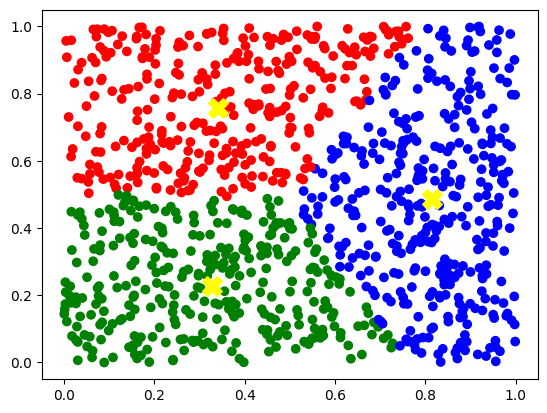

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class OnlineKMeans:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.centroids = None
        self.counts = None
        self.samples_collected = 0

    def _initialize_centroids(self, x):
        if self.samples_collected < self.n_clusters:
            if self.centroids is None:
                self.centroids = np.array([x])
                self.counts = np.array([1])
            else:
                self.centroids = np.vstack([self.centroids, x])
                self.counts = np.append(self.counts, 1)
            self.samples_collected += 1
            return True
        return False

    def partial_fit(self, x):
        if self.samples_collected < self.n_clusters:
            if self._initialize_centroids(x):
                return
        closest = np.argmin(np.linalg.norm(self.centroids - x, axis=1))
        self.counts[closest] += 1
        lr = 1 / self.counts[closest]
        self.centroids[closest] += lr * (x - self.centroids[closest])

    def predict(self, x):
        return np.array([np.argmin(np.linalg.norm(self.centroids - xi, axis=1)) for xi in x])

# 示例使用
online_kmeans = OnlineKMeans(n_clusters=3)
data_stream = np.random.rand(1000, 2)  # 模拟数据流

for xi in data_stream:
    online_kmeans.partial_fit(xi)

# 使用模型进行预测
predictions = online_kmeans.predict(data_stream)

# 绘制结果
colors = ListedColormap(['r', 'b', 'g'])
plt.scatter(data_stream[:, 0], data_stream[:, 1], c=predictions, cmap=colors)
plt.scatter(online_kmeans.centroids[:, 0], online_kmeans.centroids[:, 1], c='yellow', marker='X', s=200)
plt.show()

当然，我将逐行解释上面的 `OnlineKMeans` 类的代码，并解释其中的机器学习概念。

1-5. 类定义与初始化方法：
```python
class OnlineKMeans:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters  # 质心数量
        self.centroids = None  # 质心的初始值设为None
        self.counts = None  # 每个质心的样本数量计数器
        self.samples_collected = 0  # 已收集的样本数量
```
- 这部分代码定义了一个名为 `OnlineKMeans` 的类，它是 K-means 聚类算法的在线学习版本。
- `__init__` 函数是类的构造函数。`n_clusters` 参数指定了聚类的数量。`centroids` 保存质心的位置，初始时为 `None`。`counts` 用于记录每个质心分配的数据点数量，最初也是 `None`。`samples_collected` 跟踪接收到的样本总数。

7-16. 初始化质心的私有方法 `_initialize_centroids`：
```python
def _initialize_centroids(self, x):
    if self.samples_collected < self.n_clusters:
        if self.centroids is None:
            self.centroids = np.array([x])
            self.counts = np.array([1])
        else:
            self.centroids = np.vstack([self.centroids, x])
            self.counts = np.append(self.counts, 1)
        self.samples_collected += 1
        return True
    return False
```
- 这个方法用于在在线学习过程的开始阶段初始化质心。一开始，我们没有足够的数据点来设定所有质心，所以我们使用接收到的前几个数据点作为初始质心。
- `self.centroids` 使用接收到的数据点逐渐构建。一旦收集到与质心数量相等的数据点，就停止初始化过程。

18-24. `partial_fit` 方法：
```python
def partial_fit(self, x):
    if self.samples_collected < self.n_clusters:
        if self._initialize_centroids(x):
            return
    closest = np.argmin(np.linalg.norm(self.centroids - x, axis=1))
    self.counts[closest] += 1
    lr = 1 / self.counts[closest]
    self.centroids[closest] += lr * (x - self.centroids[closest])
```
- 这个方法用于处理单个数据点 `x`。如果质心还未初始化完全，就调用 `_initialize_centroids`。
- `np.argmin(np.linalg.norm(self.centroids - x, axis=1))` 找到最接近 `x` 的质心。
- 使用学习率（等于 1 除以该质心被分配的样本数）更新该质心的位置。这是一个简化的在线更新策略，确保了新数据对质心位置的影响随时间减小。

26-30. `predict` 方法：
```python
def predict(self, x):
    return np.array([np.argmin(np.linalg.norm(self.centroids - xi, axis=1)) for xi in x])
```
- 此方法接收一组数据点 `x`，对每个点找到最接近的质心，并返回这些质心的索引。这相当于对数据进行聚类标签的分配。

32-41. 实例化 `OnlineKMeans` 类并使用模拟数据：
```python
online_kmeans = OnlineKMeans(n_clusters=3)
data_stream = np.random.rand(1000, 2)  # 模拟数据流

for xi in data_stream:
    online_kmeans.partial_fit(xi)

predictions = online_kmeans.predict(data_stream)

# 绘制结果
colors = ListedColormap(['r', 'b', 'g'])
plt.scatter(data_stream[:, 0], data_stream[:, 1], c=predictions, cmap=colors)
plt.scatter(online_kmeans.centroids[:, 0], online_kmeans.centroids[:, 1], c='yellow', marker='X', s=200)
plt.show()
```
- 首先创建 `OnlineKMeans`

 实例，然后生成随机数据作为数据流进行模拟。
- 使用 `partial_fit` 方法逐个处理数据点，从而在线更新质心位置。
- 使用 `predict` 方法对所有数据点进行聚类，并用不同颜色可视化结果。质心以黄色十字标记显示。

选择聚类数 $K$ 
- 非监督学习，因此没有所谓的 “最佳”  $K$ 值。
- 通常是需要根据不同的问题，人工进行选择的。选择的时候思考采用聚类的动机是什么, 然后选择能最好服务于该目标的聚类数。
- 从数据本身的特征来讲, 最佳 $K$ 值对应的类别下应该是类内距离最小化并且类间距离最大化。有些辅助指标可以用来评估这种特征, 比如平均轮廓系数、类内距离/类间距离等都可以做此类评估。

1. 平均轮廓系数: $\quad S(i) \in[-1,1]$
$$
S(i)=\frac{b(i)-a(i)}{\max [a(i), b(i)]}
$$
- 其中 $a(i)$ 与 $b(i)$ 分别是第 $i$ 类的类内平均距离及其与最近类的类间平均距离。

2. “肘部法则”：
- 选择使得类内距离最小化的 $K$ 值。
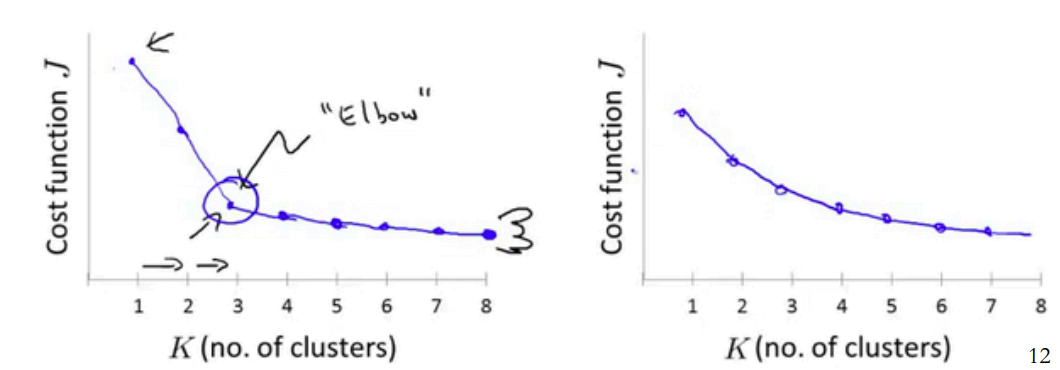

## Gaussian Mixture Models

- 假设 $\mathrm{x}$ 的分布是由多个高斯分布混合而成:
$$
p(\mathbf{x})=\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right)
$$

通过引入具有 $K$ 个离散取值的隐藏变量 $\mathbf{z}$ (采用独热编码)可以变成简单的贝叶斯网络:

其中
$$
\begin{gathered}
p(\mathbf{x}, \mathbf{z})=p(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) \\
p\left(z_k=1\right)=\pi_k \\
p\left(\mathbf{x} \mid z_k=1\right)=\mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right)
\end{gathered}
$$

Expectation-Maximization（EM）算法期望-最大化
$$
\begin{gathered}
p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\prod_n p\left(\mathbf{x}_n\right)=\prod_n \sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right) \\
\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\sum_n \ln \left[\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right)\right]
\end{gathered}
$$

最大化这个似然函数。

- 对$\boldsymbol{\mu}_k $求导, 得
$$
\boldsymbol{\mu}_k=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right) \mathbf{x}_n
$$

- 其中 $\gamma\left(z_{n k}\right) \equiv p\left(z_k=1 \mid \mathbf{x}_n\right)=\dfrac{\pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right)}$代表 $\mathbf{x}_n$ 来自第 $k$ 个高斯函数的概率, 而
$$
N_k=\sum_{n=1}^N \gamma\left(z_{n k}\right)
$$

对 $\Sigma_k$ 求导（复杂, 略), 得
$$
\boldsymbol{\Sigma}_k=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k\right)^{\mathrm{T}}
$$

对 $\pi_k$ 求导, 得

EM算法 :
$$
\pi_k=\frac{N_k}{N}
$$

- 初始化 $\mu, \Sigma, \pi$ 。
- $\mathrm{E}$ 步骤: 计算 $\gamma\left(z_{n k}\right)$
- $\mathrm{M}$ 步骤: 用上述公式更新 $\boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}$ 重复 $\mathrm{E}$ 与 $\mathrm{M}$ 步骤直至收敛。

假设 $x$ 是可观测量, $z$ 是不可观测的隐藏量。我们想通过对 $x$ 的观测来求解 $p(x, z \mid \theta)$ 中的参数 $\theta$ 。
- $p(x, z \mid \theta)$ 比较简单 (如高斯函数), 求 $\ln p(\mathbf{X}, \mathbf{Z} \mid \theta)$ 对 $\theta$ 的极值比较容易。但Z未知, 我们需考虑
$$
\begin{aligned}
& p(\mathbf{X} \mid \theta)=\prod_n p\left(x_n \mid \theta\right)=\prod_n \int p\left(x_n, z_n \mid \theta\right) d z_n \\
& \ln p(\mathbf{X} \mid \theta)=\sum_n \ln \int p\left(x_n, z_n \mid \theta\right) d z_n
\end{aligned}
$$
- 对 $\theta$ 求导数:
$$
p\left(z_n \mid x_n, \theta\right)
$$
$$
\frac{\partial \ln p(\mathbf{X} \mid \theta)}{\partial \theta}=\sum_n \frac{\int \dfrac{\partial p\left(x_n, z_n \mid \theta\right)}{\partial \theta} d z_n}{\int p\left(x_n, z_n \mid \theta\right) d z_n}=\sum_n \int\left(\frac{p\left(x_n, z_n \mid \theta\right)}{\int p\left(x_n, z_n \mid \theta\right) d z_n } \cdot \frac{\partial \ln p\left(x_n, z_n \mid \theta\right)}{\partial \theta}\right] d z_n
$$

$$
\frac{\partial \ln p(\mathbf{X} \mid \theta)}{\partial \theta}=\sum_n \int\left[p\left(z_n \mid x_n, \theta\right) \cdot \frac{\partial \ln p\left(x_n, z_n \mid \theta\right)}{\partial \theta}\right] d z_n=0
$$

利用上式可得到某些类型的迭代求解方法。在某些情况下 （如混合高斯模型），如果把 $p\left(z_n \mid x_n, \theta\right)$ 看做固定的值，即与 $\theta$ 无关,
$$
\sum_n \int\left[p\left(z_n \mid x_n, \theta_0\right) \cdot \frac{\partial \ln p\left(x_n, z_n \mid \theta\right)}{\partial \theta}\right] d z_n=0
$$

有简单的封闭形式的解, 不需迭代。
总体的迭代EM算法:
- E步骤: $\theta_0 \leftarrow \theta$, 计算 $p\left(z_n \mid x_n, \theta_0\right)$;
- M步骤: 利用上面的方程求解 $\theta$;
- 循环 ( $E, M$ ) 步骤, 直至收玫。

EM算法可以保证收玫到一个稳定点, 不过不能保证收玫到全局的极大值点

### 与K-均值法的联系

- 在高斯混合模型中（假设 $\boldsymbol{\Sigma}_k=\epsilon \mathbf{I} ）$,
$$
p\left(\mathbf{x} \mid z_k=1, \boldsymbol{\mu}_k, \mathbf{\Sigma}_k\right)=\frac{1}{\sqrt{2 \pi \epsilon}} \exp \left\{-\frac{1}{2 \epsilon}\left\|\mathbf{x}_n-\boldsymbol{\mu}_k\right\|^2\right\}
$$

- 则在E步骤中,
$$
\gamma\left(z_{n k}\right)=\frac{\pi_k \exp \left\{-\dfrac{1}{2 \epsilon}\left\|\mathbf{x}_n-\boldsymbol{\mu}_k\right\|^2\right\}}{\sum_k \pi_k \exp \left\{-\dfrac{1}{2 \epsilon}\left\|\mathbf{x}_n-\boldsymbol{\mu}_k\right\|^2\right\}}
$$

- 当 $\epsilon$ 趋向于 0 时, 离 $\mathbf{x}_n$ 最近的 $\boldsymbol{\mu}_k$ 所对应的 $\gamma\left(z_{n k}\right)=1$, 其余为 0 ,这其实就是K-均值法中对 $r_{n k}$ 的求解 (E步骤) 。

- **对 $\mu_k$ 的求解 ( $M$ 步骤) 与 $\mathrm{K}-$ 均值法中的相同。
因此，K-均值法可看做是一种硬边界的高斯混合模型。**

#### 与 K-均值法的比较

- 高斯混合模型假设数据点是高斯分布的（可以是椭圆），这是一个限制较少的假设; 而K-均值法假设它们是圆形的。

- 高斯混合模型有概率信息，可描述混合类。

- 高斯混合参数多, 求解难度比K-均值法大。

#### 离散 $\mathbf{x}$ 分布

- 也可以考虑离散的 分布, 例如其分量 $x_i=\{0,1\}$在 $z$ 固定的条件下, 进一步假设 $\mathrm{x}$ 分量的分布是独立的。这类似于朴素贝叶斯, 但此时没有已知标签。

- 通过EM算法可以从数据中学习 $z$, 并计算（预测任一新的 $\mathbf{x}$ 属于任一分类（隐藏 $z$ 值）的几率。

  - 例子：抛铜钱（各种类型，如狄青钱）。
  
  - 应用：数字识别的无监督学习EM算法。

## Chat with GPT
高斯混合模型（Gaussian Mixture Model, GMM）是一种概率模型，用来表示具有多个高斯分布子模型的数据集。在GMM中，每个子模型代表数据集中的一个簇（cluster），通常通过期望最大化（Expectation-Maximization, EM）算法来估计这些子模型的参数。

### 基本概念

#### 高斯分布（正态分布）
高斯分布是连续概率分布的一个非常重要类型，其概率密度函数（PDF）定义为：
$$ f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$
其中，$ \mu $ 是均值，$ \sigma^2 $ 是方差。

#### 高斯混合模型
高斯混合模型是多个高斯分布的线性组合。其概率密度函数可以表示为：
$$ p(x|\theta) = \sum_{k=1}^K \pi_k \mathcal{N}(x|\mu_k, \Sigma_k) $$
这里，$ \mathcal{N}(x|\mu_k, \Sigma_k) $ 是第 $ k $ 个高斯分布，$ \mu_k $ 和 $ \Sigma_k $ 分别是它的均值和协方差矩阵，$ \pi_k $ 是混合成分的权重，且满足 $ \sum_{k=1}^K \pi_k = 1 $。

### 期望最大化（EM）算法
EM算法用于估计GMM的参数（$ \mu_k, \Sigma_k, \pi_k $），其分为两个步骤：期望步（E步）和最大化步（M步）。

1. **E步**：计算每个数据点属于每个高斯成分的概率（后验概率）。
   $$ \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j, \Sigma_j)} $$
   其中，$ \gamma(z_{nk}) $ 表示数据点 $ x_n $ 属于第 $ k $ 个高斯成分的概率。

2. **M步**：使用这些概率更新参数 $ \mu_k, \Sigma_k, \pi_k $。
   $$ \mu_k^{new} = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_n}{\sum_{n=1}^N \gamma(z_{nk})} $$
   $$ \Sigma_k^{new} = \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T}{\sum_{n=1}^N \gamma(z_{nk})} $$
   $$ \pi_k^{new} = \frac{\sum_{n=1}^N \gamma(z_{nk})}{N} $$

这个过程重复进行，直到收敛（即参数变化非常小或达到预设的迭代次数）。

### 应用
GMM在许多领域都有应用，包括但不限于：
- 聚类分析：GMM可以用于软聚类，其中数据点可以以概率的形式属于多个簇。
- 异常检测：可以使用GMM对正常数据进行建模，然后找出低概率（即不太可能由该模型生成）的点作为异常。
- 图像处理：比如在图像分割中，可以使用GMM对不同区域的像素值进行建模。

GMM是一种灵活且强大的工具，但它也假设数据是由高斯分

布组成的，这在某些情况下可能不是最佳选择。此外，确定合适数量的高斯成分（即 $ K $ 的值）通常也是一个挑战。

我们可以使用Python的`scikit-learn`库来进行高斯混合模型（GMM）的聚类分析。以下是一个完整的示例，包括数据集的加载、GMM模型的创建和拟合、以及聚类结果的可视化。

为了简便起见，我们将使用`scikit-learn`内置的`iris`数据集进行演示。这个数据集包含了三种不同类型的鸢尾花（Iris）的花萼长度、花萼宽度、花瓣长度和花瓣宽度的测量数据。

1. 导入所需的库、加载数据集

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

2. 数据降维

为了便于可视化，我们使用主成分分析（PCA）将数据降至2维。

In [3]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

3. 训练GMM模型

假设我们不知道数据集中的鸢尾花类别数量，为了演示，我们选择3个高斯成分（聚类）。


In [4]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_r)

GaussianMixture(n_components=3)

4. 预测数据点的聚类标签

In [5]:
labels = gmm.predict(X_r)

5. 可视化聚类结果

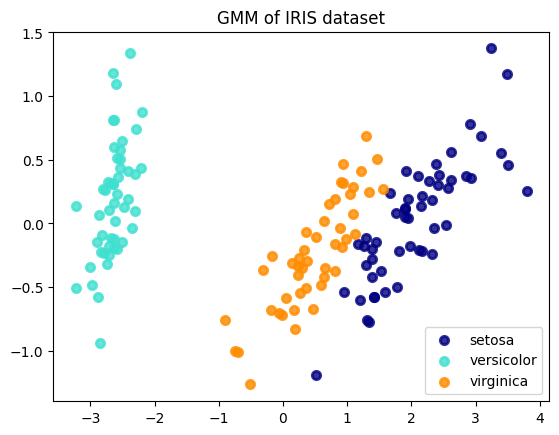

In [6]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_r[labels == i, 0], X_r[labels == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('GMM of IRIS dataset')
plt.show()

以上代码首先加载`iris`数据集，然后使用PCA进行降维，接着使用GMM进行模型训练和预测，最后将聚类结果可视化。这个示例为每种类型的鸢尾花分配了一个高斯成分，但在实际应用中，确定最佳的高斯成分数量通常需要额外的调整和验证。

我们可以使用另一个常用的数据集进行更复杂的高斯混合模型（GMM）分析。这次我们将使用`scikit-learn`库中的`make_moons`函数生成一个简单的双月形数据集。这个数据集比鸢尾花数据集在聚类任务上更具挑战性，因为它不是线性可分的。

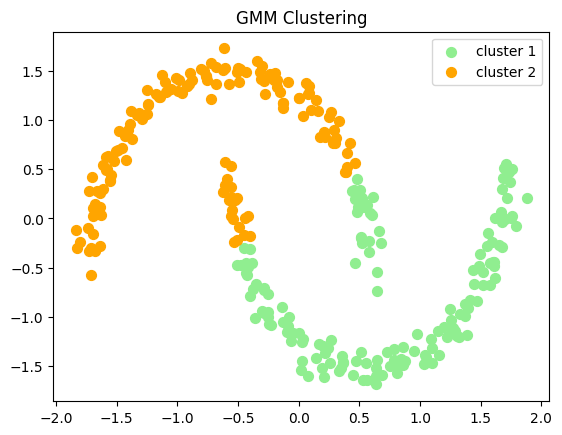

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 生成双月形数据集
# n_samples: 数据点数量
# noise: 添加到数据中的高斯噪声的标准差
# random_state: 随机数生成器的种子
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# 使用标准化来改进GMM性能
# 标准化使得每个特征的均值为0，方差为1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建并训练GMM模型
# n_components: 高斯混合的数量
# covariance_type: 每个高斯混合的协方差类型
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X_scaled)

# 使用模型对数据点进行聚类标签预测
labels = gmm.predict(X_scaled)

# 可视化聚类结果
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=50, c='lightgreen', marker='o', label='cluster 1')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.title('GMM Clustering')
plt.legend()
plt.show()


在这个示例中，我们生成了一个有两个明显“月亮”形状的数据集，并且使用了GMM进行聚类。请注意，双月形数据集可能不适合使用GMM进行聚类，因为它的形状和分布不符合GMM的假设（即每个聚类可以由一个高斯分布来近似）。然而，这个例子仍然展示了GMM在非标准数据集上的应用。

另外，为了更好地处理复杂数据集，可以尝试更多的高斯成分、不同的协方差类型（如`covariance_type='tied'` 或 `'diag'`）以及进行模型选择（例如，使用信息准则如AIC或BIC来选择最佳的成分数）。

我将使用Python的`sklearn`库中的高斯混合模型（GMM）实现手写数字识别的无监督学习，这是一种常用的期望最大化（EM）方法。我们将使用`sklearn`中的手写数字数据集（digits），该数据集包含1797个8x8像素的手写数字图像。

以下是实现过程及其注释：

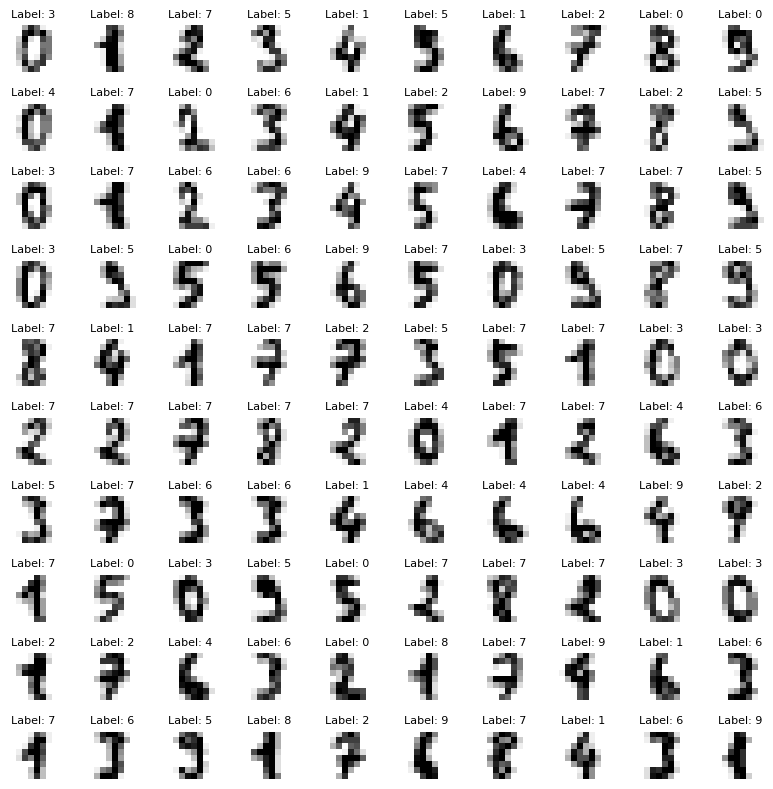

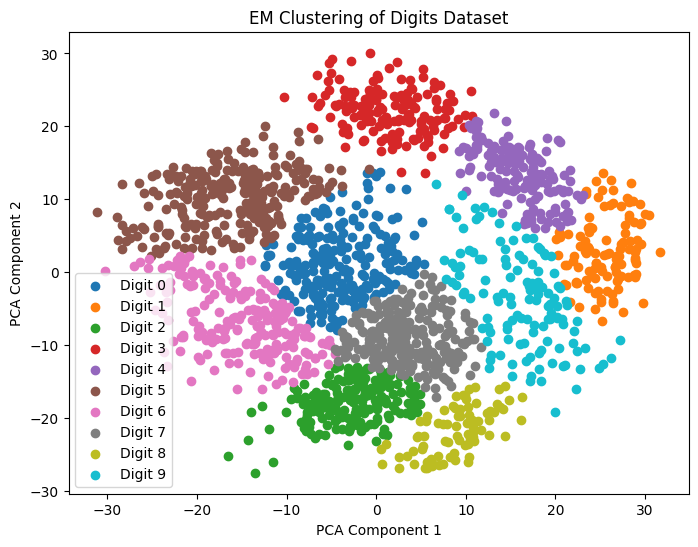

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 加载手写数字数据集
digits = datasets.load_digits()

# 使用PCA进行降维处理
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data)

# 使用GaussianMixture进行模型训练
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
gmm.fit(reduced_data)

# 使用模型进行聚类预测
labels = gmm.predict(reduced_data)

# 可视化函数
def visualize_clustered_digits(images, labels, n_rows=10, n_cols=10):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 8))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i * n_cols + j
            ax[i, j].imshow(images[index].reshape(8, 8), cmap='binary')
            ax[i, j].set_title(f'Label: {labels[index]}', fontsize=8)
            ax[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# 可视化聚类后的手写数字
visualize_clustered_digits(digits.images, labels)

# 使用模型进行聚类预测
labels = gmm.predict(reduced_data)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Digit {i}')
plt.legend()
plt.title('EM Clustering of Digits Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


在这段代码中，首先加载了`sklearn`自带的手写数字数据集。由于原始数据是64维的，这使得直接在二维空间中可视化变得困难，因此我使用了PCA（主成分分析）方法将数据降到了2维。然后，使用高斯混合模型对降维后的数据进行训练和聚类，设置了10个高斯组件，对应于10个数字（0-9）。最后，我将聚类结果在二维平面上进行了可视化展示。

## 层次聚类（Hierarchical Clustering）

层次聚类（Hierarchical Clustering）是一种常用的数据分析方法，用于构建数据的层次结构。层次聚类不需要事先指定簇的数量，它会生成一个簇的层次树。这种聚类可以分为两大类：凝聚的层次聚类（Agglomerative Hierarchical Clustering）和分裂的层次聚类（Divisive Hierarchical Clustering）。

### 凝聚的层次聚类
凝聚的层次聚类是最常见的形式。其工作原理如下：
1. **初始化**：开始时，将每个数据点视为一个单独的簇。
2. **找到最近的簇**：计算所有簇之间的距离，并将最近的两个簇合并成一个新簇。
3. **重复**：重复第2步，直到所有数据点都聚合成一个簇。

合并簇时，簇之间的距离可以通过不同的方式来度量，如：
- **单链接（Single Linkage）**：簇间距离定义为簇中最近两个点之间的距离。
- **全链接（Complete Linkage）**：簇间距离定义为簇中最远两个点之间的距离。
- **平均链接（Average Linkage）**：簇间距离定义为簇中所有点对的平均距离。
- **质心距离（Centroid Distance）**：簇间距离定义为两个簇的质心之间的距离。

### 分裂的层次聚类
分裂的层次聚类是另一种方法，其工作原理如下：
1. **开始**：最开始时，将所有数据点视为一个簇。
2. **分裂**：将簇分裂为更小的簇。
3. **重复**：重复第2步，直到每个簇只包含一个数据点。

### 数学表示
凝聚的层次聚类可以使用以下步骤进行数学描述：
1. 设数据集为 $\{x_1, x_2, ..., x_n\}$，其中 $x_i$ 是数据点。
2. 定义簇 $C_i$，最初每个簇只包含一个点：$C_i = \{x_i\}$。
3. 定义簇间距离 $D(C_i, C_j)$，可以是上述提到的任一种方式。
4. 找到距离最小的簇对 $(C_i, C_j)$，并合并它们。
5. 更新簇的集合，重复步骤3和4，直到只剩下一个簇。

### 可视化
层次聚类的结果通常使用树状图（Dendrogram）进行可视化。树状图展示了数据点是如何逐步合并成簇的，其中每次合并操作都对应树上的一个节点。

### 应用
层次聚类广泛应用于各种领域，包括生物信息学（如基因表达数据分析）、图像分析、市场细分等。

下面是一个较为复杂的层次聚类（Hierarchical Clustering）的Python实现示例。在这个例子中，我将使用Scikit-Learn的`AgglomerativeClustering`类来实现凝聚的层次聚类，并使用SciPy的函数来绘制树状图。我还会引入一些数据预处理的步骤。

我们将使用著名的鸢尾花（Iris）数据集进行聚类。

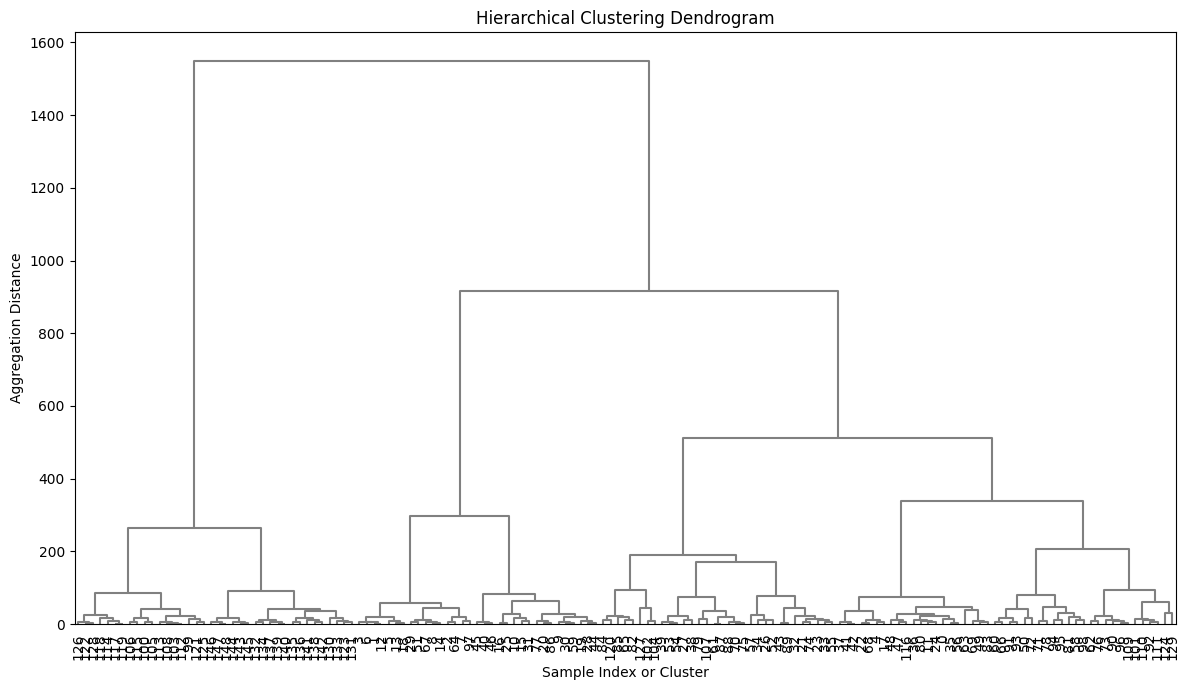

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将数字标签转换为英文标签
labels = np.array(['Setosa', 'Versicolor', 'Virginica'])[y]

# 定义凝聚的层次聚类模型
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# 应用层次聚类模型
model = clustering.fit(X)

# 使用SciPy构建树状图的链接矩阵
Z = linkage(model.children_, method='ward')


# 绘制树状图
plt.figure(figsize=(12, 7))
dendrogram(Z, color_threshold=0, above_threshold_color='grey', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster')
plt.ylabel('Aggregation Distance')
plt.xticks(rotation=90)  # 旋转x轴标签以提高可读性
plt.tight_layout()  # 调整布局以适应窗口大小
plt.show()

**代码解释**：
1. **数据加载**：使用Scikit-Learn加载鸢尾花数据集。
2. **聚类模型定义**：创建`AgglomerativeClustering`对象，设定`n_clusters=None`和`distance_threshold=0`表示不预设固定的簇数量，而是基于距离阈值进行聚类。
3. **聚类应用**：将模型应用于鸢尾花数据。
4. **构建链接矩阵**：使用SciPy的`hierarchy.linkage`方法构建树状图所需的链接矩阵。
5. **绘制树状图**：使用`dendrogram`函数绘制层次聚类的树状图，其中横轴表示样本索引，纵轴表示聚合时的距离。

这个例子展示了如何使用层次聚类来分析并可视化鸢尾花数据集。通过树状图，我们可以直观地看到数据点是如何逐渐被合并成更大的簇的。

## InfoMap（信息图）

InfoMap（信息图）是一种基于网络结构的数据聚类方法，它主要用于探测复杂网络中的社区结构。这种方法是由Martin Rosvall 和 Carl T. Bergstrom 提出的，用于揭示网络中的信息流动和社区结构。InfoMap 的核心思想是寻找一种网络分割方式，使得随机游走（Random Walk）在这些社区内部的信息描述（编码）最为简洁。

### 数学公式和原理

在InfoMap方法中，网络被视作一个系统，其中节点表示系统的不同状态，而边则表示状态之间的转移概率。对于一个给定的网络分割，可以构建一个基于状态转移的随机游走模型。

InfoMap 的目标是最小化描述随机游走路径所需的信息量。具体来说，这涉及到对以下两类信息进行编码：
1. **节点访问信息**：随机游走访问每个节点的信息。
2. **社区切换信息**：随机游走从一个社区转移到另一个社区的信息。

数学上，这可以被表达为最小化描述随机游走的平均信息长度。对于一个分割，这个长度可以表示为：

$$ L(M) = q_{\text{exit}} H(Q) + \sum_{i=1}^{m} p_{\text{intra}}^i H(P^i) $$

其中：
- $ L(M) $ 是给定网络分割 $ M $ 的描述长度。
- $ q_{\text{exit}} $ 是随机游走离开其当前社区的概率。
- $ H(Q) $ 是社区之间切换的熵。
- $ p_{\text{intra}}^i $ 是随机游走在社区 $ i $ 内部的概率。
- $ H(P^i) $ 是在社区 $ i $ 内部节点之间切换的熵。
- $ m $ 是社区的数量。

在这个公式中，第一项 $ q_{\text{exit}} H(Q) $ 代表跨社区边界移动时的信息量，而第二项 $\sum_{i=1}^{m} p_{\text{intra}}^i H(P^i)$ 则代表在社区内部移动时的信息量。

### 应用

InfoMap 在多个领域中得到应用，包括社会网络分析、生物信息学、交通流量分析等。通过使用InfoMap，研究人员可以识别出网络中的模块化结构，这些结构通常代表了具有相似功能或特性的实体群体。

### 实现

InfoMap的实现通常涉及到复杂的图形算法和信息论的知识。在实际应用中，可以使用现成的工具和库，如Python中的`networkx`库或者专门的InfoMap实现。这些工具可以帮助研究人员在不同类型的网络数据上应用InfoMap算法，并分析其社区结构。

In [12]:
%pip install networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement networkx (from versions: none)
ERROR: No matching distribution found for networkx


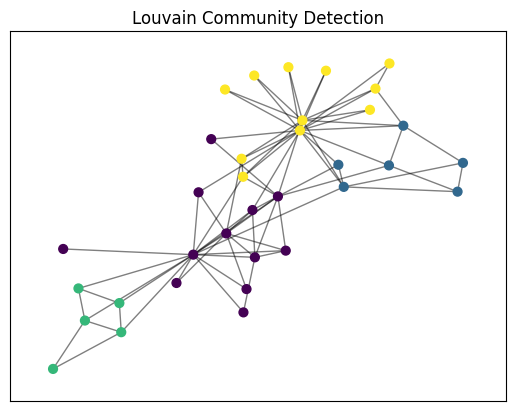

In [13]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 创建一个网络
def create_network():
    G = nx.karate_club_graph()  # 使用networkx内置的空手道俱乐部网络
    return G

# 应用Louvain方法进行社区发现
def apply_louvain(G):
    # 使用Louvain方法找到最佳社区结构
    partition = community_louvain.best_partition(G)
    return partition

# 可视化结果
def visualize_result(G, partition):
    # 绘制网络图，为不同的社区着不同的颜色
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title("Louvain Community Detection")
    plt.show()

# 主函数
def main():
    G = create_network()  # 创建网络
    partition = apply_louvain(G)  # 应用Louvain方法
    visualize_result(G, partition)  # 可视化结果

main()



这段代码将完成以下步骤：

1. 创建一个网络。这里我们使用了`networkx`库中内置的空手道俱乐部网络作为示例。这个网络是一个小型的社交网络，经常用于社区发现和网络分析的示例。

2. 应用Louvain方法来识别网络中的社区结构。`community_louvain.best_partition`函数会返回一个字典，字典的键是网络中节点的标识，值是分配给这些节点的社区编号。

3. 可视化结果。使用`matplotlib`库，我们将网络中的每个节点根据它们所属的社区着不同的颜色，并绘制出网络图。

这个例子展示了使用`python-louvain`库对一个小型网络执行社区发现的基本流程。您可以将这个流程应用于更大或更复杂的网络，以探索和可视化它们的社区结构。

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 是一种基于密度的聚类算法，它能够识别任意形状的聚类，并能在聚类过程中识别噪声点（即不属于任何聚类的点）。这种算法特别适合处理具有噪声和异常点的数据集。

### DBSCAN的主要概念：

1. **核心点（Core Points）**：
    - 核心点是指在给定的半径（`eps`）内有足够数量（`minPts`）的邻居点的点。
    - 公式表示：如果在点`p`的`eps`邻域内至少有`minPts`个点（包括`p`自身），则`p`是一个核心点。
    
2. **边界点（Border Points）**：
    - 边界点在`eps`邻域内有少于`minPts`个邻居，但是它至少在一个核心点的邻域内。
    - 它是聚类的边缘部分，但不足以形成自己的聚类。

3. **噪声点（Noise Points）**：
    - 不是核心点也不是边界点的点被认为是噪声点。
    - 这些点不属于任何聚类。

### DBSCAN算法的步骤：

1. 对于每个点，计算其邻域内的点的数量。
2. 标记满足核心点条件的点（`eps`邻域内有至少`minPts`个点）。
3. 对于每个核心点，如果它尚未被分配到任何聚类，则创建一个新的聚类，并递归地将所有可达的核心点和边界点添加到该聚类中。
   - **可达性**：点`q`在点`p`的`eps`邻域内，且`p`是核心点，则`q`是从`p`可达的。
4. 继续这个过程，直到所有的点都被处理。

### 数学表达式：

- 设`X`是数据点的集合，`x_i ∈ X`是其中的一个点。
- 定义`eps`邻域：`N_eps(x_i) = {x_j ∈ X | dist(x_i, x_j) ≤ eps}`，其中`dist(·, ·)`是距离函数。
- 如果`|N_eps(x_i)| ≥ minPts`，则`x_i`是核心点。
- 如果`x_j ∈ N_eps(x_i)`但`|N_eps(x_j)| < minPts`，则`x_j`是边界点。

### 优点和缺点：

- **优点**：
  - 不需要事先知道聚类的数量。
  - 能够识别任意形状的聚类。
  - 对噪声和异常点具有较好的鲁棒性。

- **缺点**：
  - 当聚类的密度差异较大时，选择合适的`eps`和`minPts`参数可能较难。
  - 如果数据集的维度非常高（高维数据），性能可能会下降。

DBSCAN是一种在许多实际应用中非常有效的聚类方法，尤其是在数据集中存在大量噪声和异常值时。

下面是一个使用Python实现DBSCAN算法的例子。在这个例子中，我们将使用sklearn库中的DBSCAN实现对合成数据集进行聚类。这个数据集包含几个不同密度的聚类以及一些噪声点。我们将展示如何应用DBSCAN算法，以及如何根据结果进行可视化。

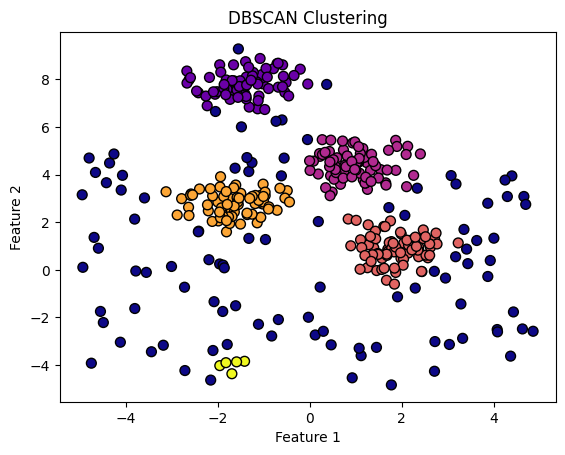

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 生成合成数据集
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 添加一些噪声点
np.random.seed(42)
noisy_points = np.random.uniform(low=-5, high=5, size=(100, 2))
X = np.vstack([X, noisy_points])

# 应用DBSCAN算法
# eps是邻域的大小，min_samples是形成核心点所需的最小邻居数
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

代码解释：

1. `make_blobs`用于生成具有一定数量中心点的合成数据集，这里设置了4个中心。
2. 添加了一些随机分布的噪声点，以模拟实际情况中的噪声。
3. 使用DBSCAN进行聚类。`eps`参数设置邻域的大小，`min_samples`设置形成核心点所需的最小邻居数。
4. `fit_predict`方法对数据进行拟合，并返回每个点的聚类标签。
5. 使用matplotlib绘制聚类结果，不同的颜色代表不同的聚类，噪声点通常被标记为-1，用特定的颜色表示。

这个例子展示了DBSCAN处理不同密度的聚类和噪声点的能力。通过调整`eps`和`min_samples`的值，可以对算法的敏感度和聚类结果产生显著影响。

## 社区检测（Community Detection）是

社区检测（Community Detection）是图论和网络分析中的一个重要概念，它指的是在一个网络中识别出结构上密切相关或功能上相似的节点集合的过程。在机器学习和数据科学中，社区检测常用于揭示社交网络、生物网络、交通网络等复杂系统中的潜在结构。

### 基本概念

1. **网络（Network）**: 由一组节点（vertices）和连接这些节点的边（edges）组成的集合。网络可以是有向的（directed）或无向的（undirected）。

2. **社区（Community）**: 网络中一组节点的集合，这些节点内部的连接比与网络其他部分的连接更加紧密。

### 数学原理

在数学上，社区检测通常依赖于图论的概念和方法。假设有一个图 $ G = (V, E) $，其中 $ V $ 是节点集，$ E $ 是边集。社区检测的目标是找到一个节点的划分 $ C = \{C_1, C_2, ..., C_k\} $，这样每个 $ C_i $ 都是 $ V $ 的一个子集，并且这些子集之间相互不相交。

### 社区检测的目标

目标是最大化社区内部的边的密度，同时最小化社区之间的边的密度。这可以通过不同的方式来量化，例如模块度（Modularity）是一种常见的度量方法。

#### 模块度（Modularity）

模块度是衡量一个给定的社区划分质量的指标。它的定义如下：

$$ Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j) $$

其中：

- $ A_{ij} $ 是邻接矩阵中的元素，如果节点 $ i $ 和 $ j $ 之间有边则为1，否则为0。
- $ k_i $ 和 $ k_j $ 分别是节点 $ i $ 和 $ j $ 的度（连接的边数）。
- $ m $ 是图中边的总数。
- $ \delta(c_i, c_j) $ 是一个指示函数，当 $ c_i = c_j $（即节点 $ i $ 和 $ j $ 在同一个社区）时为1，否则为0。

模块度的值介于-1和1之间，值越高表示社区内的连接比随机期望的连接更密集。

### 社区检测方法

社区检测的方法有很多，常见的包括：

- **贪婪算法**：如Louvain方法，通过局部优化模块度来识别社区。
- **层次聚类**：基于节点间的相似性或距离构建层次树。
- **谱聚类**：使用图的拉普拉斯矩阵的特征向量来发现社区结构。
- **优化方法**：比如使用遗传算法或模拟退火算法寻找最大模块度的划分。

社区检测在许多领域都有应用，如社交网络分析、生物信息学、市场研究等。通过识别网络中的社区结构，我们可以更好地理解和解释复杂系统的功能和动态行为。

In [15]:
%pip install networkx python-louvain matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


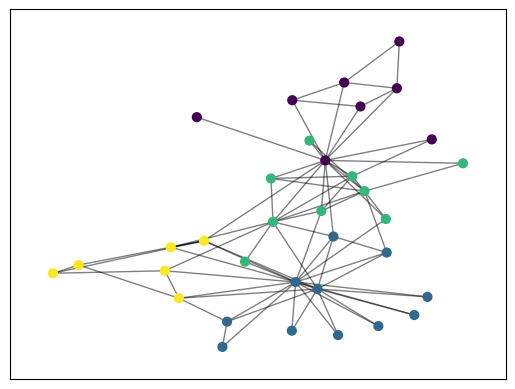

In [16]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 生成一个社交网络图（这里使用Karate Club网络作为示例）
G = nx.karate_club_graph()

# 使用Louvain方法进行社区检测
partition = community_louvain.best_partition(G)

# 绘制结果
pos = nx.spring_layout(G)  # 计算节点的位置
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

这段代码做了以下几件事：

1. 使用`networkx`创建一个Karate Club网络图。这是一个经典的社交网络图，用于展示社区检测算法的效果。
2. 利用`community`库的Louvain方法对网络进行社区划分。
3. 使用`matplotlib`库绘制网络图，不同颜色代表不同的社区。

这个示例展示了如何在一个简单的网络中应用社区检测算法，并将结果可视化。在现实世界的应用中，你可能需要处理更复杂的网络和更大规模的数据。

c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_spectral.py:590: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  "The spectral clustering API has changed. ``fit``"
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA seq

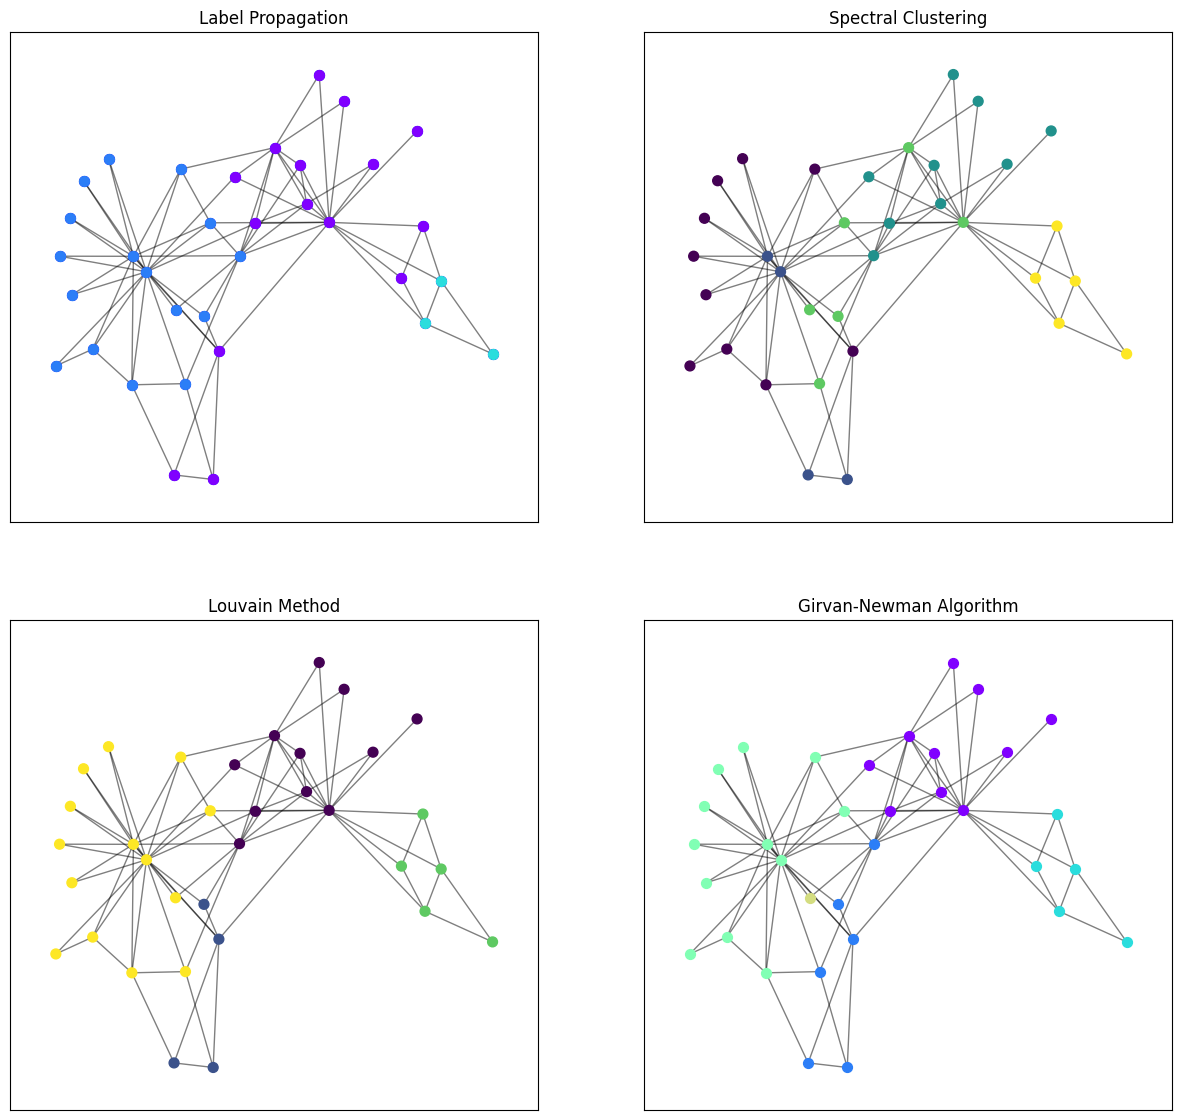

In [20]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import scipy.cluster.hierarchy as sch
from sklearn.cluster import SpectralClustering

# 创建或加载图
G = nx.karate_club_graph()  # 示例中使用空手道俱乐部网络
pos = nx.spring_layout(G)  # 节点的布局

# 生成足够数量的颜色
num_communities = max(len(communities_label_propagation), 5)  # 获取最大社区数量
color_map = cm.rainbow(np.linspace(0, 1, num_communities))  # 生成颜色

# 使用Louvain方法进行社区检测
partition_louvain = community_louvain.best_partition(G)

# 使用Girvan-Newman算法进行社区检测
comp = nx.community.girvan_newman(G)
k = 5
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    partition_girvan_newman = tuple(sorted(c) for c in communities)

# 使用标签传播算法进行社区检测
communities_label_propagation = list(nx.community.label_propagation_communities(G))

# 使用谱聚类进行社区检测
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
labels_spectral = sc.fit_predict(nx.adjacency_matrix(G))

# 绘制标签传播算法的结果
plt.figure(figsize=(15, 14))
plt.subplot(221)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
for i, community in enumerate(communities_label_propagation):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=50, node_color=color_map[i])
plt.title('Label Propagation')

# 绘制谱聚类的结果
plt.subplot(222)
cmap = cm.get_cmap('viridis', max(labels_spectral) + 1)
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=labels_spectral)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Spectral Clustering')

# 绘制Louvain方法的结果
plt.subplot(223)
nx.draw_networkx_nodes(G, pos, partition_louvain.keys(), node_size=50, cmap=cmap, node_color=list(partition_louvain.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Louvain Method')

# 绘制Girvan-Newman算法的结果
plt.subplot(224)
for i, community in enumerate(partition_girvan_newman):
    nx.draw_networkx_nodes(G, pos, community, node_size=50, node_color=color_map[i])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Girvan-Newman Algorithm')

plt.show()